In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Advanced ML \ Sem_1 \ Mod_1 \ Task_5.2

#### Task_1

In [82]:
def mnk(x_,y_):
    param_A = np.vstack([x_, np.ones(len(x_))]).T
    a, b = np.linalg.lstsq(param_A, y_, rcond=None)[0]
    return a,b

In [83]:
def mnk2(x_,y_):
    n = len(x_)
    mx = x_.sum()/n
    my = y_.sum()/n
    a2 = np.dot(x_.T, x_)/n
    a11 = np.dot(x_.T, y_)/n
    a_ = (a11 - mx * my) / (a2 - mx ** 2)
    b_ = my - a_ * mx
    return a_, b_

In [84]:
x = np.linspace(0, 10, 30)
y = np.linspace(0, 10, 30)*(10+4*np.random.rand(30)) + (10+4*np.random.rand(30))

a,b = mnk(x,y)

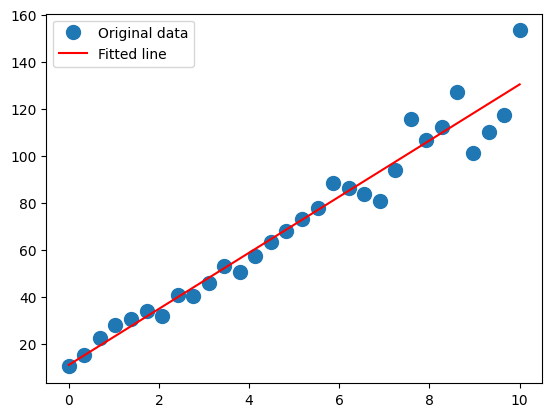

In [85]:
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, a*x + b, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

#### Task_2

In [136]:
df = pd.DataFrame({
    'name': ['Petr', 'Anna', 'Ivan', 'Maria', 'Natasha', 'Alexey', 'Nina', 'Maria'],
    'city': ['Moscow', 'Novosibirsk', np.nan, 'Samara', 'Vladivostok', 'Sochi', 'Irkutsk', 'Samara'],
    'age': [41.0, 28.0, 31.0, 34.0, np.nan, 31.0, 0.0, 34.0]
    })

In [138]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df["age"].replace(0, df[df['age'] > 0]["age"].mean(), inplace = True)
print(df, df['age'].mean())

     name         city   age
0    Petr       Moscow  41.0
1    Anna  Novosibirsk  28.0
3   Maria       Samara  34.0
5  Alexey        Sochi  31.0
6    Nina      Irkutsk  33.5 33.5


#### Task_3

In [139]:
cars_data = pd.read_csv('Electric_Car.csv')
cars = pd.DataFrame(cars_data)

In [149]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [147]:
Carsgroupby = cars.groupby('Brand').mean()
Carsgroupby['PriceEuro'].sum()

/var/folders/mn/dbx4zk2j6jn7r75_nv1cm6980000gq/T/ipykernel_78533/3692914315.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Carsgroupby = cars.groupby('Brand').mean()


1706238.541025641

#### Task_4

In [154]:
Cars_speed = cars[(cars['PriceEuro'] > 50000) & (cars['TopSpeed_KmH'] > 200)]
Cars_speed.reset_index(inplace=True)
Cars_speed.head()

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
2,5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
3,16,Porsche,Taycan Turbo S,2.8,260,375,223,780,Yes,AWD,Type 2 CCS,Sedan,F,4,180781
4,21,Tesla,Model Y Long Range Dual Motor,5.1,217,425,171,930,Yes,AWD,Type 2 CCS,SUV,D,7,58620


#### Task_4

In [155]:
ec_data = pd.read_csv('EC.csv')
evp_data = pd.read_csv('EVP.csv')

ec = pd.DataFrame(ec_data)
evp = pd.DataFrame(evp_data)

In [161]:
integral = evp.merge(ec, on='Brand', how='left')
describe_pd = integral.describe()